# "Прихотливая" индексация (fancy indexing)

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
# нужно получить доступ к 3 7 2 элементу

In [3]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [4]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [5]:
# В случае "прихотливой" индексации форма результата отражает форму массивов индексов(index arrays),
# а не форму индексированного массива
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [7]:
# Многомерные массивы
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [9]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [10]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

### Комбинированная индексация

In [11]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [12]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [13]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [14]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Выборка случайных точек

In [15]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

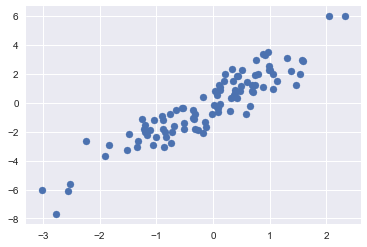

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

# Нормальное распределеные точки
plt.scatter(X[:, 0], X[:, 1]);

In [18]:
# Сделаем выборку 20 случайных точек
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([95, 23,  3, 55, 35, 63, 24, 31, 15, 47, 80, 12, 36, 39, 16, 30, 57,
       83, 20, 56])

In [19]:
selection = X[indices]
selection.shape

(20, 2)

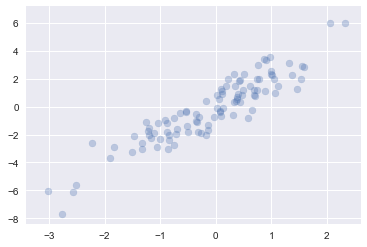

In [20]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);